https://exofop.ipac.caltech.edu/tess/target.php?id=460205581

In [76]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pl

Tmag = 9.9322 #± 0.006

In [79]:
import lightkurve as lk

#download a tpf using lightkurve package
target_coord = "10:28:08.95 -64:30:18.76" #ticid = 460205581 
tpf = lk.search_tesscut(target_coord, sector=10).download(cutout_size=(20, 20))

In [82]:
flux = tpf.flux
time = tpf.time

In [83]:
time.shape, flux.shape

((1205,), (1205, 20, 20))

In [84]:
import sys
sys.path.append('..')
import vinify as vn

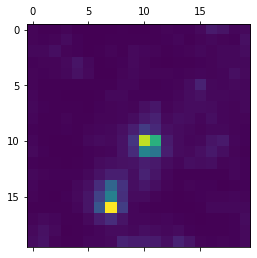

In [85]:
# get a median image from the time-series image data
img = np.nanmedian(flux, axis=0)
pl.matshow(img)

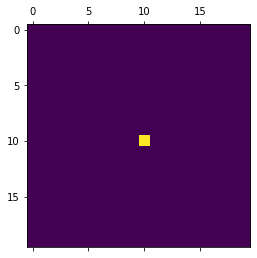

In [86]:
# calculate the max number of pixel used for aperture
area_thresh = vn.determine_area_thresh(Tmag)

# determine pixels for aperture
cx = cy = tpf.shape[1]//2 #choose middle
aperture = vn.determin_aperture(img, (cx, cy), area_thresh=area_thresh)
pl.matshow(aperture)

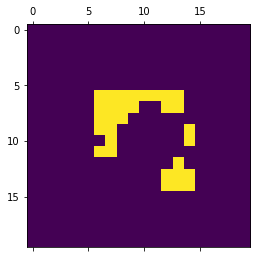

In [87]:
# determine pixels for background
bkg_aperture = vn.make_background(img, (cx, cy), aperture)
pl.matshow(bkg_aperture)

In [88]:
# create time-series iamge data containing only background pixels
bkg_frame = np.where(bkg_aperture == 1, flux, np.nan)
bkg_frame.shape

(1205, 20, 20)

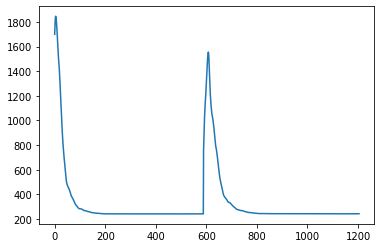

In [89]:
# take the average
bkg_arr = np.nanmean(bkg_frame, axis=(1, 2))
pl.plot(bkg_arr)

In [90]:
calibrated_flux = flux - bkg_arr.reshape((bkg_arr.shape[0], 1, 1))
calibrated_flux.shape

(1205, 20, 20)

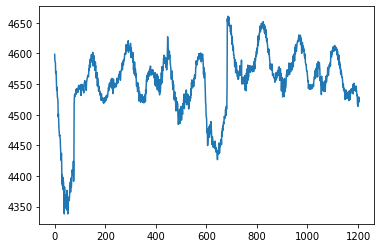

In [91]:
# create the light curve
aperture_frame = np.where(aperture == 1, calibrated_flux, 0)
sap_flux = np.sum(aperture_frame, axis=(1, 2))
pl.plot(sap_flux)